In [2]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import xgboost as xgb

In [3]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [34]:
def XGB(finnum):    
    df = fdr.DataReader(f'{finnum}', '2018-01-01', '2023-01-01')
    dfx = df[['Open','High','Low','Volume', 'Close']]
    dfx = MinMaxScaler(dfx)
    dfy = dfx[['Close']]
    dfx = dfx[['Open','High','Low','Volume']]
    dfx=dfx.reset_index()
    dfx=dfx.set_index(keys='Date')


    X = dfx.values.tolist()
    y = dfy.values.tolist()

    #며칠데이터로 예측
    window_size = 10

    data_X = []
    data_y = []
    for i in range(len(y) - window_size):
        _X = X[i : i + window_size] 
        _y = y[i + window_size]     
        data_X.append(_X)
        data_y.append(_y)


    n=len(data_y)

    train_X = np.array(data_X[0:int(n*0.7)])
    train_y = np.array(data_y[0:int(n*0.7)])

    val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
    val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

    test_X = np.array(data_X[int(n*0.9):])
    test_y = np.array(data_y[int(n*0.9):])

    validation_data = (val_X,val_y)
    
    if train_X.shape==(855,10,4):        
    
        train_X=train_X.reshape(855,40)
        test_X=test_X.reshape(123,40)


        my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)


        my_model.fit(train_X, train_y, verbose=False)

        pred_y = my_model.predict(test_X)


        RMSE_predict=np.sqrt(mean_squared_error(test_y, pred_y))
        f2_y_predict = r2_score(test_y, pred_y)
        
    else:
        RMSE_predict=np.nan
        f2_y_predict=np.nan
    
    return RMSE_predict,f2_y_predict

In [35]:
kospi50 = pd.read_csv('./Kospi50.csv', encoding='cp949')

In [36]:
kospi50['종목코드']=kospi50['종목코드'].apply(lambda x : str(x).zfill(6))

In [37]:
kospi50['RMSE']=np.nan
kospi50['R2']=np.nan
kospi50

,종목코드,종목명,RMSE,R2
0,005930,삼성전자,NaN,NaN
1,373220,LG에너지솔루션,NaN,NaN
2,000660,SK하이닉스,NaN,NaN
3,207940,삼성바이오로직스,NaN,NaN
4,005490,POSCO홀딩스,NaN,NaN
5,006400,삼성SDI,NaN,NaN
6,051910,LG화학,NaN,NaN
7,005380,현대차,NaN,NaN
8,035420,NAVER,NaN,NaN
9,003670,포스코퓨처엠,NaN,NaN


In [38]:
for i in range(0,50):
    RMSE,R2=XGB(kospi50.iloc[i,0])
    kospi50.iloc[i,2]=RMSE
    kospi50.iloc[i,3]=R2
    print(kospi50.iloc[i,1])

삼성전자
LG에너지솔루션
SK하이닉스
삼성바이오로직스
POSCO홀딩스
삼성SDI
LG화학
현대차
NAVER
포스코퓨처엠
기아
현대모비스
KB금융
셀트리온
카카오
삼성물산
신한지주
LG전자
SK이노베이션
삼성생명
LG
삼성화재
KT&G
카카오뱅크
한국전력
하나금융지주
삼성에스디에스
두산에너빌리티
SK
고려아연
SK텔레콤
삼성전기
하이브
우리금융지주
S-Oil
기업은행
HD한국조선해양
KT
HMM
아모레퍼시픽
크래프톤
LG생활건강
SK바이오팜
현대글로비스
카카오페이
롯데케미칼
SK바이오사이언스
엔씨소프트
LG디스플레이
넷마블


In [39]:
kospi50

,종목코드,종목명,RMSE,R2
0,005930,삼성전자,0.024866,0.696135
1,373220,LG에너지솔루션,NaN,NaN
2,000660,SK하이닉스,0.026316,0.872055
3,207940,삼성바이오로직스,0.035099,0.467882
4,005490,POSCO홀딩스,0.023124,0.932526
5,006400,삼성SDI,0.041030,0.828142
6,051910,LG화학,0.053707,0.460599
7,005380,현대차,0.022568,0.899414
8,035420,NAVER,0.049842,0.746816
9,003670,포스코퓨처엠,0.171552,-0.036358


In [47]:
kospi50=kospi50.dropna(axis=0)
kospi50

,종목코드,종목명,RMSE,R2
0,005930,삼성전자,0.024866,0.696135
2,000660,SK하이닉스,0.026316,0.872055
3,207940,삼성바이오로직스,0.035099,0.467882
4,005490,POSCO홀딩스,0.023124,0.932526
5,006400,삼성SDI,0.041030,0.828142
6,051910,LG화학,0.053707,0.460599
7,005380,현대차,0.022568,0.899414
8,035420,NAVER,0.049842,0.746816
9,003670,포스코퓨처엠,0.171552,-0.036358
10,000270,기아,0.069880,0.372123


In [57]:
kospi50.loc[kospi50['R2']<0.50]

,종목코드,종목명,RMSE,R2
3,207940,삼성바이오로직스,0.035099,0.467882
6,051910,LG화학,0.053707,0.460599
9,003670,포스코퓨처엠,0.171552,-0.036358
10,000270,기아,0.069880,0.372123
26,018260,삼성에스디에스,0.199478,-28.194480
27,034020,두산에너빌리티,0.175996,-3.661455
29,010130,고려아연,0.260265,-1.752195
37,030200,KT,0.196850,-15.131885
38,011200,HMM,0.133610,-8.163901
39,090430,아모레퍼시픽,0.073836,-1.061478


In [58]:
kospi50.loc[kospi50['R2']>=0.50]

,종목코드,종목명,RMSE,R2
0,005930,삼성전자,0.024866,0.696135
2,000660,SK하이닉스,0.026316,0.872055
4,005490,POSCO홀딩스,0.023124,0.932526
5,006400,삼성SDI,0.041030,0.828142
7,005380,현대차,0.022568,0.899414
8,035420,NAVER,0.049842,0.746816
11,012330,현대모비스,0.020417,0.730878
12,105560,KB금융,0.025563,0.797889
13,068270,셀트리온,0.023994,0.654998
14,035720,카카오,0.023623,0.881907


In [59]:
kospi50.loc[kospi50['R2']>=0.85]

,종목코드,종목명,RMSE,R2
2,000660,SK하이닉스,0.026316,0.872055
4,005490,POSCO홀딩스,0.023124,0.932526
7,005380,현대차,0.022568,0.899414
14,035720,카카오,0.023623,0.881907
18,096770,SK이노베이션,0.019998,0.875932
19,032830,삼성생명,0.012143,0.926064
22,033780,KT&G,0.037583,0.908877
25,086790,하나금융지주,0.024271,0.915001
35,024110,기업은행,0.018340,0.905476
47,036570,엔씨소프트,0.019129,0.892053


In [74]:
import pickle

with open( "./kospi50XGB", "wb" ) as file:
    pickle.dump( kospi50, file)

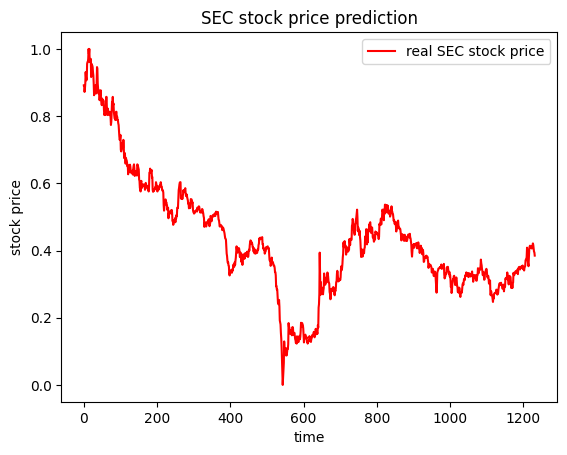

In [69]:
df = fdr.DataReader('032830', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()


plt.figure()
plt.plot(y, color='red', label='real SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

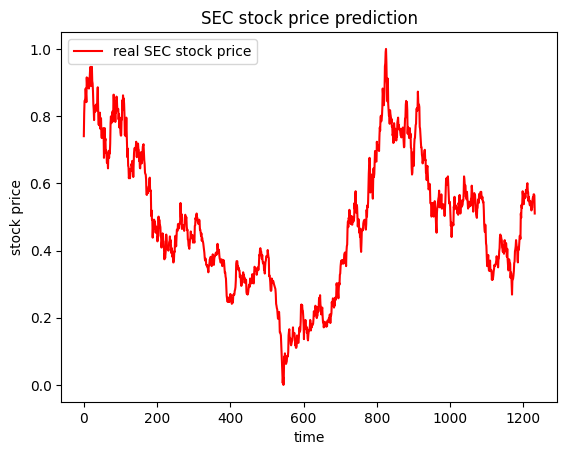

In [66]:
df = fdr.DataReader('005490', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()


plt.figure()
plt.plot(y, color='red', label='real SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

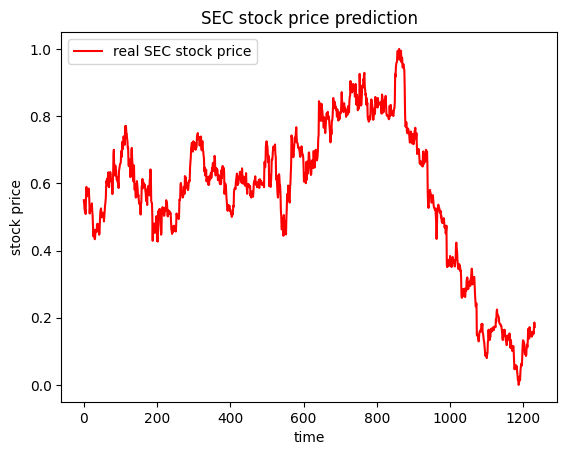

In [67]:
df = fdr.DataReader('051900', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()


plt.figure()
plt.plot(y, color='red', label='real SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

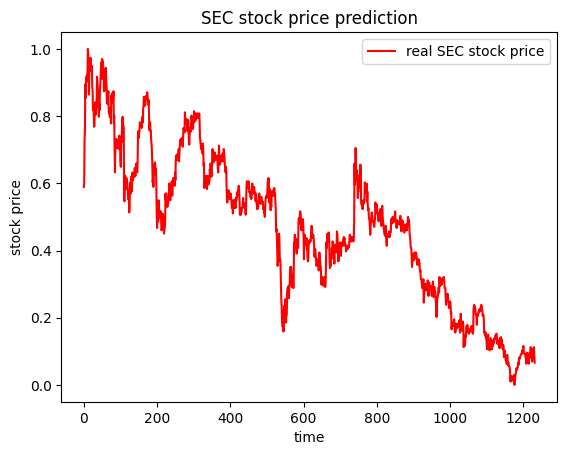

In [68]:
df = fdr.DataReader('018260', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()


plt.figure()
plt.plot(y, color='red', label='real SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

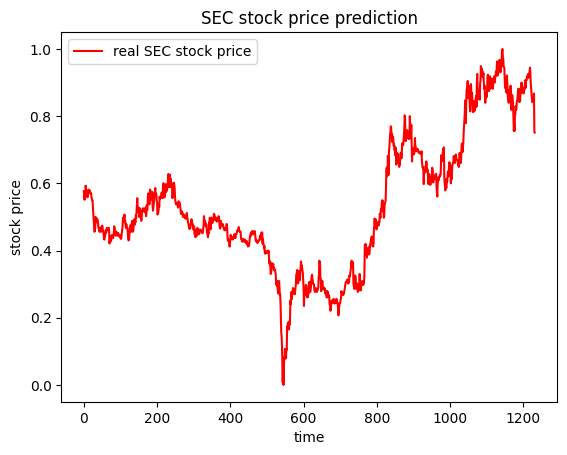

In [71]:
df = fdr.DataReader('030200', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()


plt.figure()
plt.plot(y, color='red', label='real SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()